In [4]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [20]:
neighborhoods = gpd.read_file('../Data/neighborhoods.geojson')
print(neighborhoods.crs)
neighborhoods.head( )

epsg:4326


,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,East Hill,"MULTIPOLYGON (((-86.74659 36.20376, -86.74559 ..."
4,Cleveland Park,"MULTIPOLYGON (((-86.75606 36.18857, -86.75600 ..."


In [ ]:
print(type(neighborhoods))

In [ ]:
neighborhoods.loc[0, 'geometry']

In [ ]:
print(neighborhoods.loc[0, 'geometry'])

In [ ]:
neighborhoods.plot();

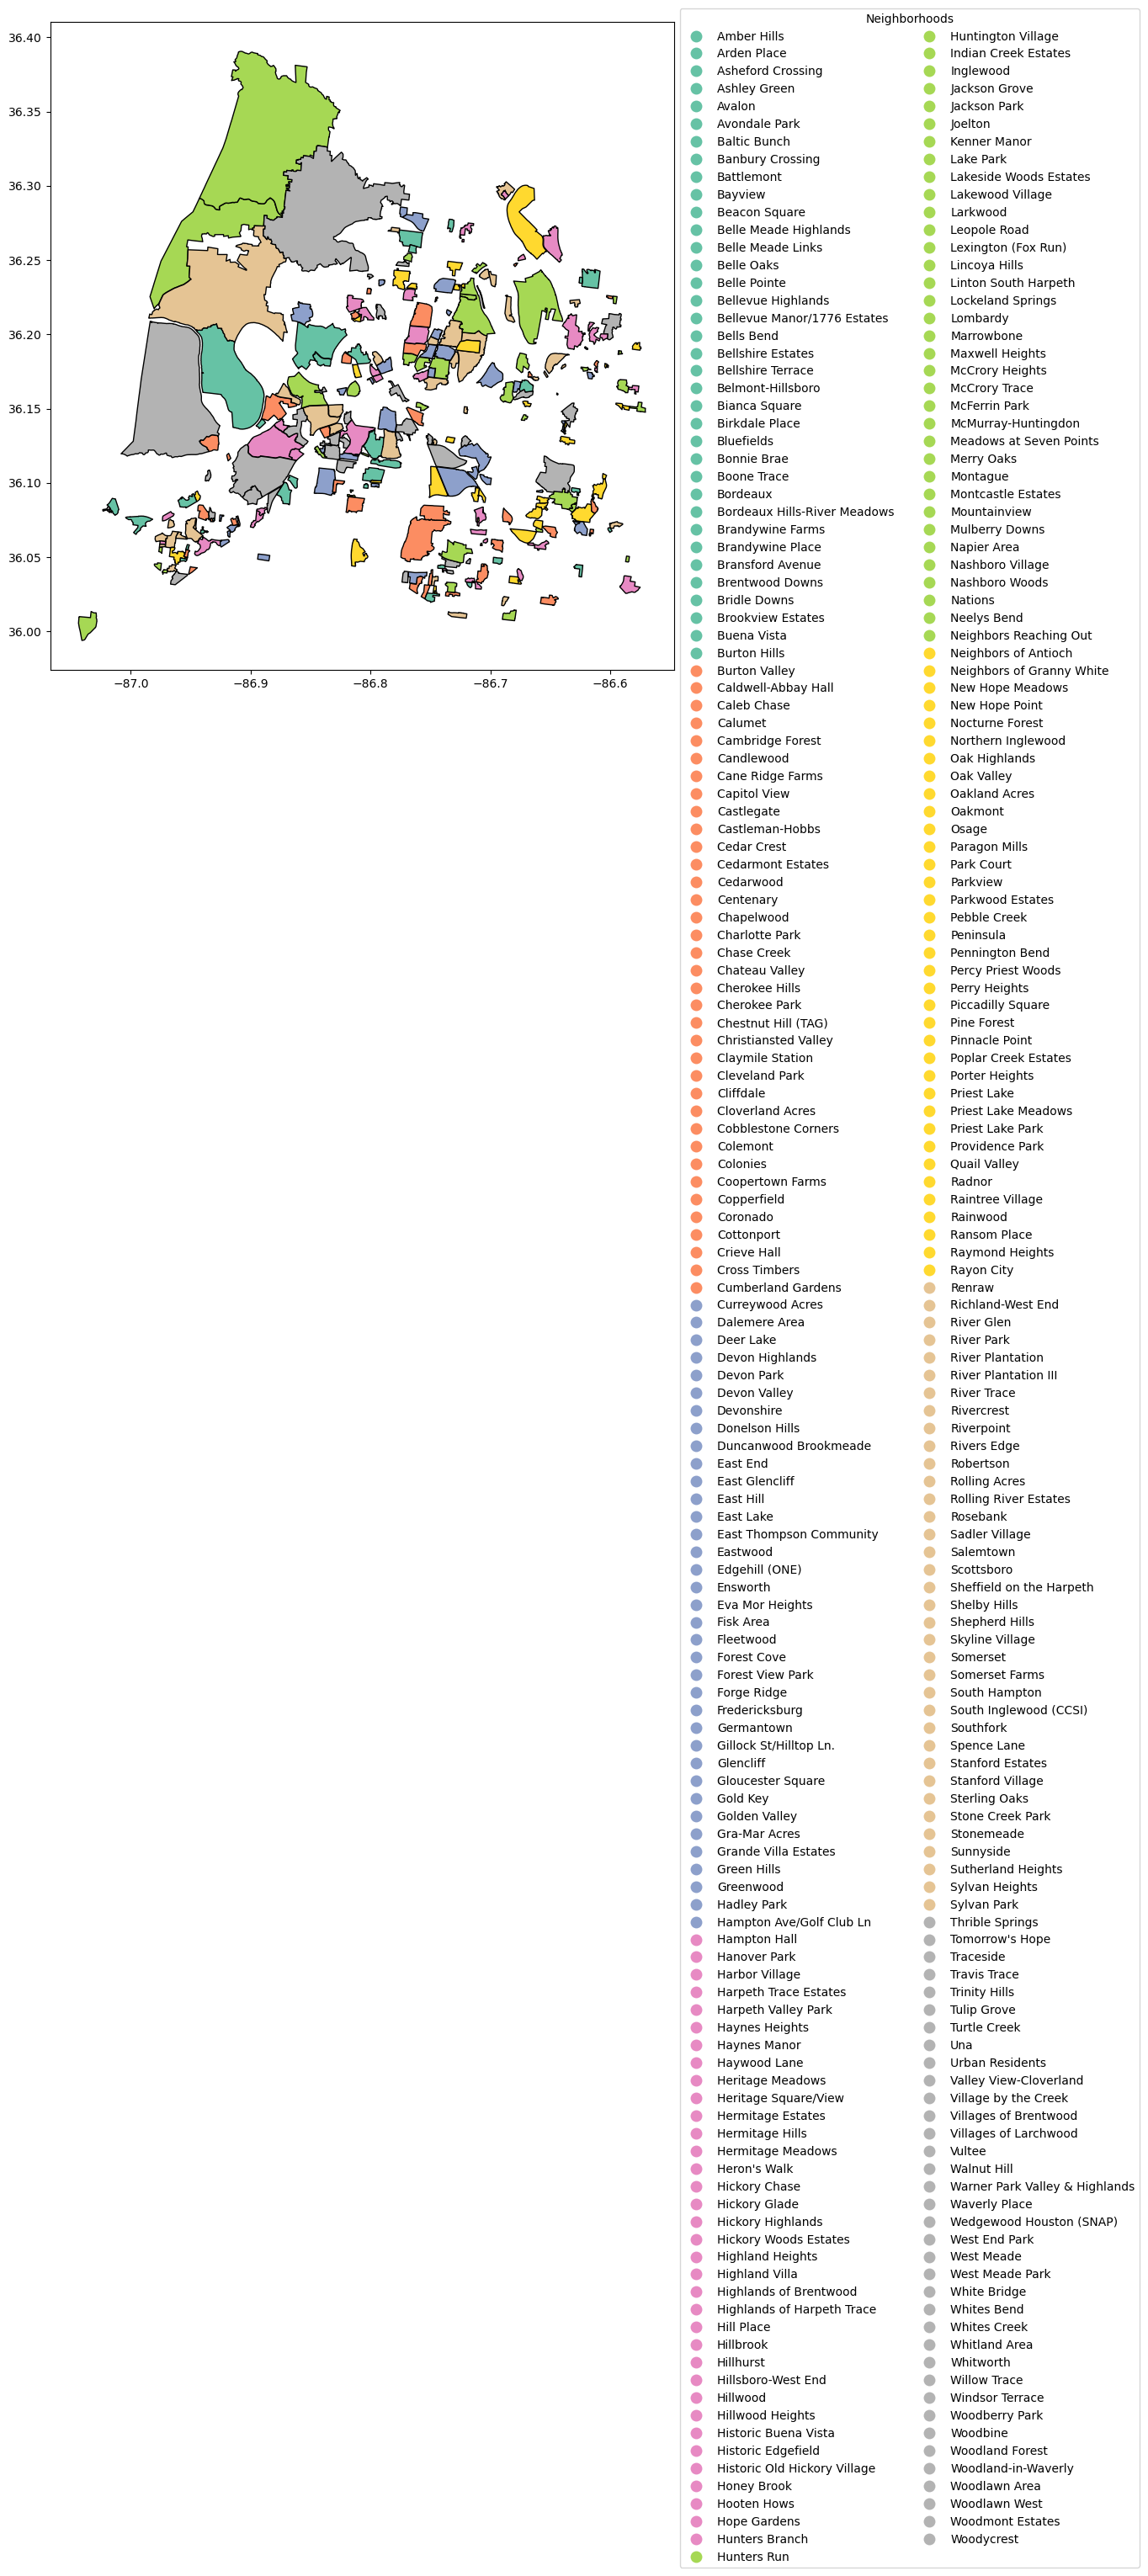

In [42]:
leg_kwds = {'title': 'Neighborhoods', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

neighborhoods.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [40]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
bike_racks = gpd.read_file('../Data/bike_racks_gis.geojson')

In [74]:
bike_racks.shape

(430, 13)

In [50]:
racks_geo = gpd.GeoDataFrame(bike_racks, 
                           crs = neighborhoods.crs, 
                           geometry = bike_racks['geometry'])

In [51]:
type(racks_geo)

geopandas.geodataframe.GeoDataFrame

In [55]:
racks_by_hood = gpd.sjoin(racks_geo, neighborhoods, op = 'within')

In [56]:
racks_by_zip.head()

,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry,index_right,name
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246),18,Historic Edgefield
111,Warner Elementary School,0,Elementary School,Public,312,112,Proposed,-86.7603189731,Rack,Health Dept,36.1722220733,0,POINT (-86.76032 36.17222),18,Historic Edgefield
393,East Park - Woodland St @ S 8th St,0,Park,Public,415,394,Future Artistic,-86.7587196799,Rack,Civic,36.1740162738,0,POINT (-86.75872 36.17402),18,Historic Edgefield
394,East Park - Warner Public School Entrance,0,Park,Public,416,395,Future Artistic,-86.7603126805,Rack,Civic,36.1722879774,0,POINT (-86.76031 36.17229),18,Historic Edgefield
395,East Park - Warner Public School Entrance,0,Park,Public,417,396,Future Artistic,-86.7602654582,Rack,Civic,36.1722096836,0,POINT (-86.76027 36.17221),18,Historic Edgefield


In [58]:
racks_by_hood['name'].value_counts()

Urban Residents                 51
Sylvan Park                     10
Hillsboro-West End               9
Nations                          6
Lockeland Springs                6
Woodbine                         6
Edgehill (ONE)                   6
Historic Edgefield               5
Glencliff                        4
Sunnyside                        4
Germantown                       4
Bordeaux                         4
Eastwood                         3
Capitol View                     3
Inglewood                        3
Historic Buena Vista             3
Napier Area                      2
Neighbors of Antioch             2
Hillwood                         2
Historic Old Hickory Village     2
Jackson Park                     2
Greenwood                        2
Chestnut Hill (TAG)              2
Shelby Hills                     2
Rosebank                         2
Highland Heights                 2
McFerrin Park                    2
Maxwell Heights                  2
Buena Vista         

In [60]:
racks_in_downtown = racks_by_hood.loc[racks_by_hood['name'] == 'Urban Residents']
racks_in_downtown.shape

(51, 15)

In [61]:
polygon_downtown = neighborhoods.loc[neighborhoods['name'] == 'Urban Residents']
polygon_downtown.shape

(1, 2)

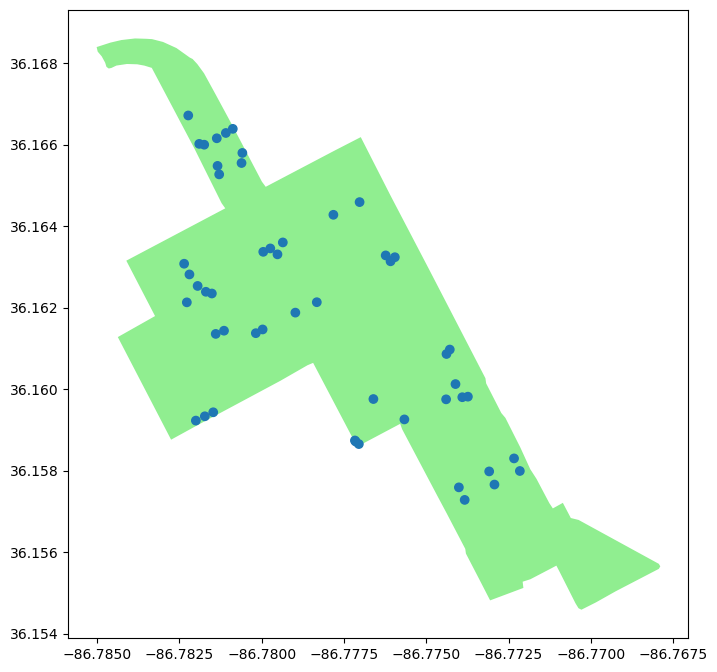

In [77]:
ax = polygon_downtown.plot(figsize = (8, 10), color = 'lightgreen')
racks_in_downtown.plot( ax = ax, column = 'name');
plt.show();

In [63]:
polygon_downtown.geometry.centroid

C:\Users\tyler\AppData\Local\Temp\ipykernel_7216\2151880368.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_downtown.geometry.centroid


43    POINT (-86.77756 36.16128)
dtype: geometry

In [64]:
center = polygon_downtown.geometry.centroid[43]
print(center)

POINT (-86.77756457127047 36.16127820928791)


C:\Users\tyler\AppData\Local\Temp\ipykernel_7216\981258031.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_downtown.geometry.centroid[43]


In [65]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.161278209287914, -86.77756457127047]


In [69]:
#create our map of Nashville Zip Code 37207 and show it
map_downtown = folium.Map(location =  area_center, zoom_start = 15)
map_downtown

In [70]:
i = 0
for row_index, row_values in racks_in_downtown.iterrows():
    if i < 3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 9
values are:
 
detail_loc     Bus Stop; Church St at 5th Ave N, Fifth Third ...
quantity                                                       0
location                                                Bus Stop
domain                                                    Public
idnumber                                                      83
objectid                                                      10
status                                           Future Artistic
lon                                               -86.7799546267
type                                                        Rack
data_colle                                           Health Dept
lat                                                36.1633719897
capacity                                                       0
geometry            POINT (-86.77995462667019 36.16337198970625)
index_right                                                   43
name                                             Urban Residents


In [75]:
#draw our zip code area: 37207
map_downtown = folium.Map(location =  area_center, zoom_start = 15)

folium.GeoJson(polygon_downtown).add_to(map_downtown)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in racks_in_downtown.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['name'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_downtown)
map_downtown.save('../maps/mapdowntown.html')

#display our map
map_downtown